In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import the needed libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

# DATA MANIPULATION
import pandas as pd
import numpy as np
import math

# DATA VISUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.decomposition import PCA

# Interaction
from ipywidgets import widgets, interact

# First view to the Data

In [3]:
raw_data = pd.read_csv(r"/content/drive/MyDrive/Datasets/kc_house_data.csv")
df = raw_data.copy()
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.sample(1).iloc[0]

id                    2877101100
date             20141110T000000
price                   700000.0
bedrooms                       3
bathrooms                   1.75
sqft_living                 2100
sqft_lot                    5000
floors                       1.5
waterfront                     0
view                           0
condition                      3
grade                          8
sqft_above                  2100
sqft_basement                  0
yr_built                    1916
yr_renovated                   0
zipcode                    98117
lat                      47.6776
long                     -122.36
sqft_living15               1830
sqft_lot15                  4200
Name: 5520, dtype: object

In [5]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

There are 21613 observations and 21 features in this dataset. 



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
print("Number of Duplicated Data:",df.duplicated().sum())

Number of Duplicated Data: 0


In [8]:
print("Number of Missing Values:\n",df.isna().sum())

Number of Missing Values:
 id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [9]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
# Showing the main charactaristics of each column in the dataset
@interact(column = df.columns)
def column_info(column):
    print("*" * 10, column, "*" * 10)
    display(df[column].value_counts())
    print("-" * 30)
    display(df[column].describe())
    print("=" * 40)

interactive(children=(Dropdown(description='column', options=('id', 'date', 'price', 'bedrooms', 'bathrooms', …

***Observation:***


1.   Date column need to convert into datatime type.
2.   Bathrooms & Floors need to be int.
3.   Drop Id & Zip Code columns.
4.   There is ("0") in Bedrooms & Bathrooms.
5.   There is ("33") in Bedrooms, Which is outlier so convert it to ("3").



# Feature Engineering

In [11]:
# Convert ("date") column into datetime.
df["date"] = pd.to_datetime(df['date'])

In [12]:
# make a new columns from date column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [13]:
# Round up values to the nearest whole number & Convert it to int
df['room_has_bathroom'] = (df['bathrooms'] % 1 == 0.5).astype(int)
df["bathrooms"] = df["bathrooms"].apply(math.ceil)

In [14]:
# Round up values to the nearest whole number & Convert it to int
df["floors"] = df["floors"].apply(math.ceil)

In [15]:
# Drop unneeded columns for now.
df.drop(columns=["id","zipcode"], inplace = True)

In [16]:
# Knowing how many rooms with 0 value.
print("Number of rows containing 0 in 'bedrooms' column:", (df['bedrooms'] == 0).sum())
print("Number of rows containing 0 in 'bathrooms' column:", (df['bathrooms'] == 0).sum())

Number of rows containing 0 in 'bedrooms' column: 13
Number of rows containing 0 in 'bathrooms' column: 10


In [17]:
# So it turns out it's a very small among of data, so we will drop it.
df.drop(df[df['bedrooms'] == 0].index, inplace=True)
df.drop(df[df['bathrooms'] == 0].index, inplace=True)

In [18]:
# Make the age column to see the age of the building.
df["age"] = np.abs(df["year"] - df["yr_built"])

In [19]:
# Make the renov_age to see how many years passed since the last renovation.
df['renov_age'] = np.abs(df['yr_renovated'] - df['yr_built'])
# Make sure if the building hav'nt been renovation before to put the value = 0.
df['renov_age'] = df["renov_age"].apply(lambda x: x if len(str(int(x)))==2 else 0.0)

In [20]:
# Showing the house with 33 bedrooms to know whether to change it to 3 or what.
df[df['bedrooms'] == 33]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,room_has_bathroom,age,renov_age
15870,2014-06-25,640000.0,33,2,1620,6000,1,0,0,5,...,0,47.6878,-122.331,1330,4700,2014,6,0,67,0.0


In [21]:
# Change the outlier value in beedrooms column.
df['bedrooms'] = df['bedrooms'].replace(33, 3)

In [22]:
# Create a new column to put the grades into categoreis.
bins = [0, 5, 9, 13]
labels = ['Low', 'Avg', 'High']
df['grade_group'] = pd.cut(df['grade'], bins=bins, labels=labels, right=True)

In [23]:
# Drop uneedded columns.
df.drop(columns=["date","grade","yr_built","yr_renovated"], inplace = True)

In [24]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,lat,long,sqft_living15,sqft_lot15,year,month,room_has_bathroom,age,renov_age,grade_group
0,221900.0,3,1,1180,5650,1,0,0,3,1180,...,47.5112,-122.257,1340,5650,2014,10,0,59,0.0,Avg
1,538000.0,3,3,2570,7242,2,0,0,3,2170,...,47.7210,-122.319,1690,7639,2014,12,0,63,40.0,Avg
2,180000.0,2,1,770,10000,1,0,0,3,770,...,47.7379,-122.233,2720,8062,2015,2,0,82,0.0,Avg
3,604000.0,4,3,1960,5000,1,0,0,5,1050,...,47.5208,-122.393,1360,5000,2014,12,0,49,0.0,Avg
4,510000.0,3,2,1680,8080,1,0,0,3,1680,...,47.6168,-122.045,1800,7503,2015,2,0,28,0.0,Avg


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21597 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   price              21597 non-null  float64 
 1   bedrooms           21597 non-null  int64   
 2   bathrooms          21597 non-null  int64   
 3   sqft_living        21597 non-null  int64   
 4   sqft_lot           21597 non-null  int64   
 5   floors             21597 non-null  int64   
 6   waterfront         21597 non-null  int64   
 7   view               21597 non-null  int64   
 8   condition          21597 non-null  int64   
 9   sqft_above         21597 non-null  int64   
 10  sqft_basement      21597 non-null  int64   
 11  lat                21597 non-null  float64 
 12  long               21597 non-null  float64 
 13  sqft_living15      21597 non-null  int64   
 14  sqft_lot15         21597 non-null  int64   
 15  year               21597 non-null  int32   
 16  month    

In [26]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,year,month,room_has_bathroom,age,renov_age
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402029e+05,3.371811,2.440478,2080.321850,1.509941e+04,1.542205,0.007547,0.234292,3.409825,1788.596842,291.725008,47.560093,-122.213982,1986.620318,12758.283512,2014.322962,6.573969,0.355142,43.324397,2.185998
std,3.671337e+05,0.904096,0.922309,918.106125,4.141264e+04,0.567159,0.086549,0.766390,0.650546,827.759761,442.667800,0.138552,0.140724,685.230472,27274.441950,0.467619,3.115061,0.478567,29.375646,11.545251
min,7.800000e+04,1.000000,1.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000,0.000000,0.000000,0.000000
25%,3.220000e+05,3.000000,2.000000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,47.471100,-122.328000,1490.000000,5100.000000,2014.000000,4.000000,0.000000,18.000000,0.000000
50%,4.500000e+05,3.000000,3.000000,1910.000000,7.618000e+03,2.000000,0.000000,0.000000,3.000000,1560.000000,0.000000,47.571800,-122.231000,1840.000000,7620.000000,2014.000000,6.000000,0.000000,40.000000,0.000000
75%,6.450000e+05,4.000000,3.000000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,2210.000000,560.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,9.000000,1.000000,63.000000,0.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,4.000000,1.000000,4.000000,5.000000,9410.000000,4820.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000,1.000000,115.000000,99.000000


# Data Visualization & EDA

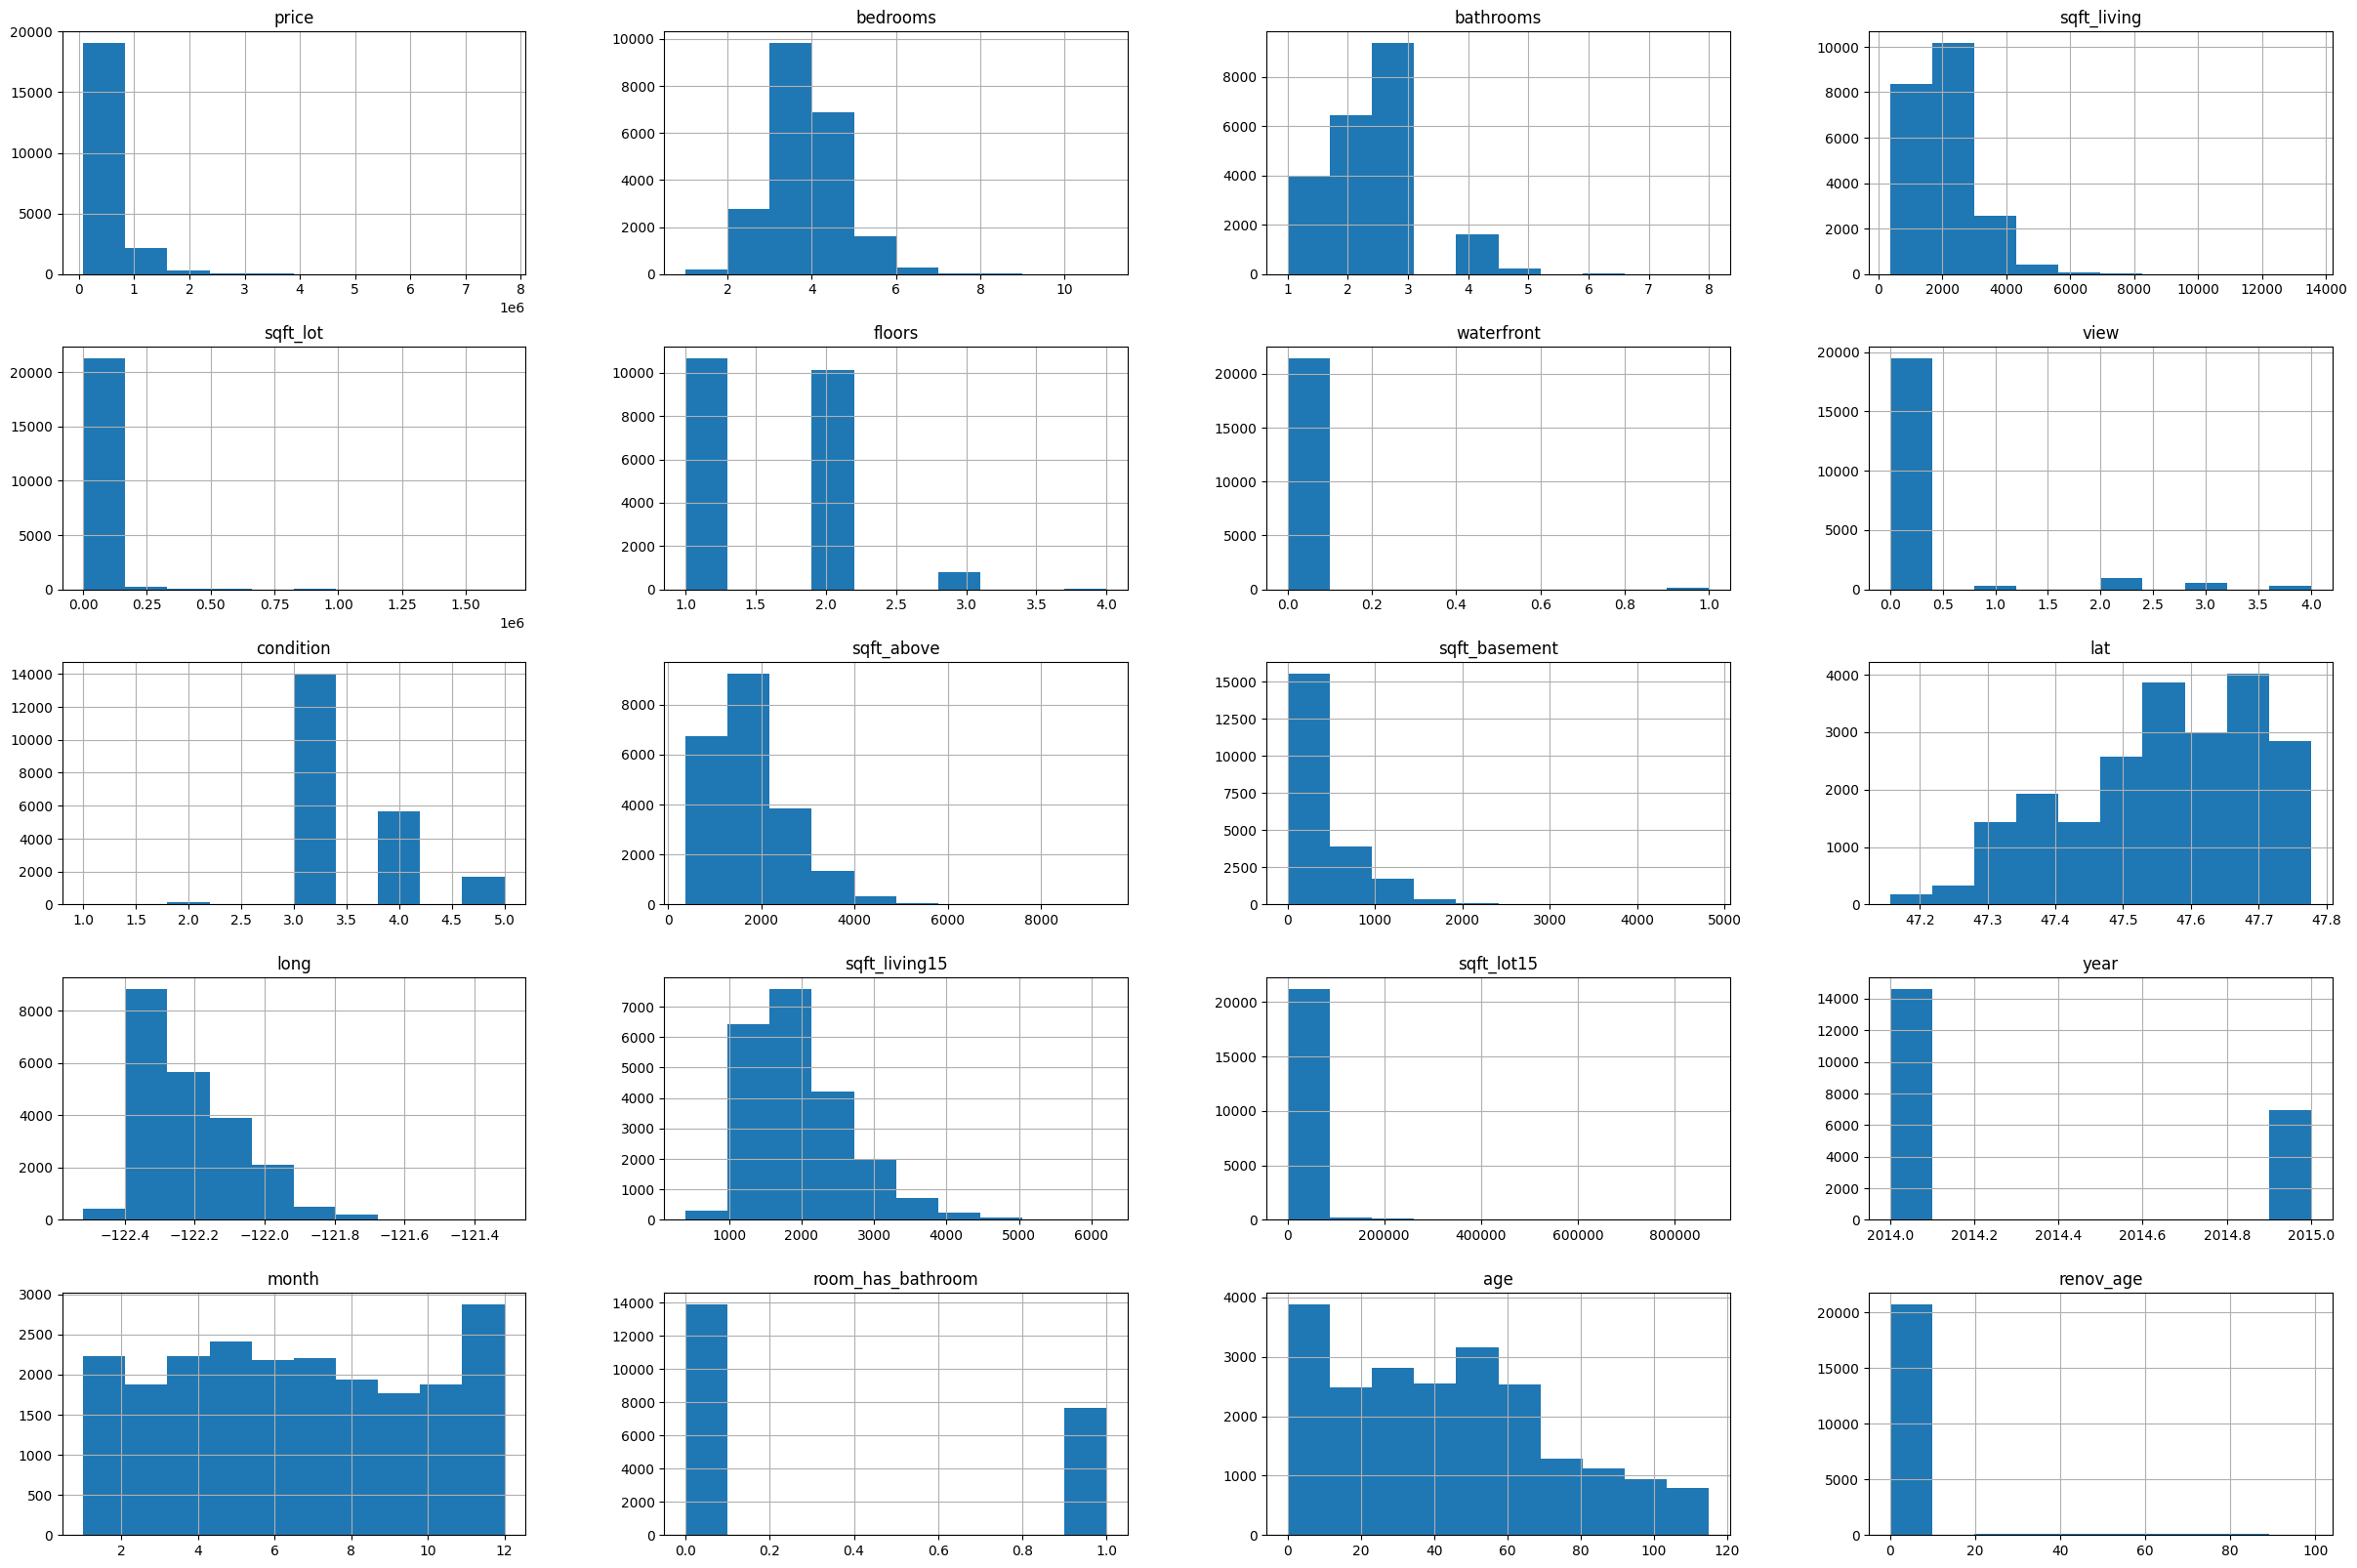

In [27]:
df.hist(figsize=(30,20));

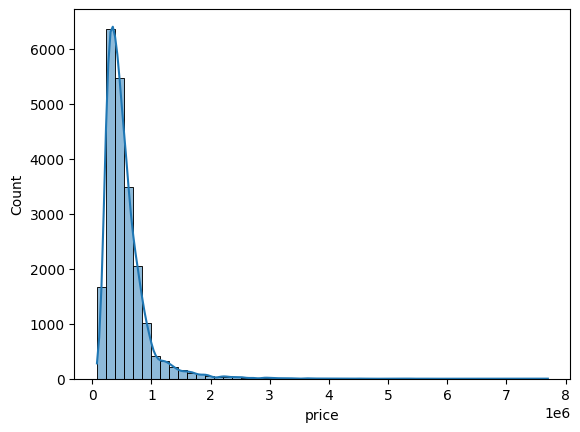

In [28]:
sns.histplot(df['price'],kde=True,bins=50);

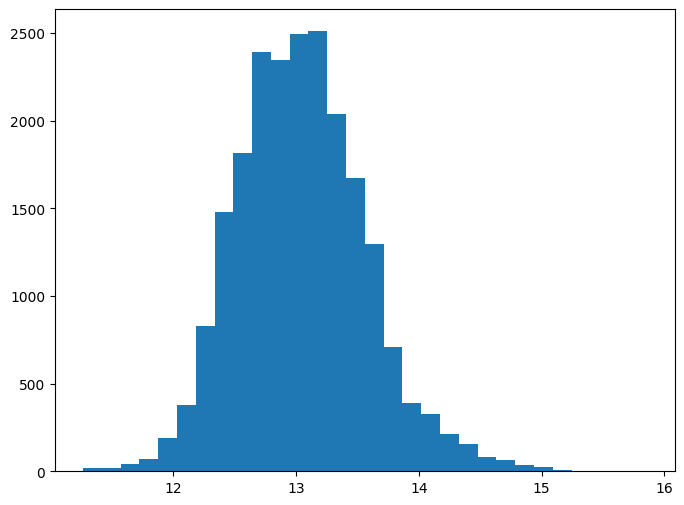

In [29]:
log_price = np.log1p(df["price"])
plt.figure(figsize=(8, 6))
plt.hist(log_price, bins=30);

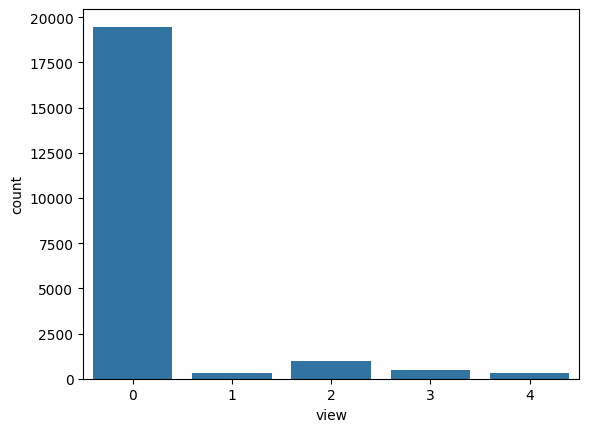

In [30]:
sns.countplot(x='view',data=df);

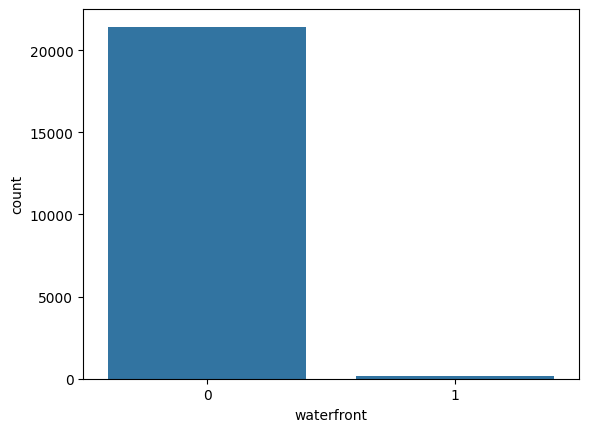

In [31]:
sns.countplot(x='waterfront',data=df);

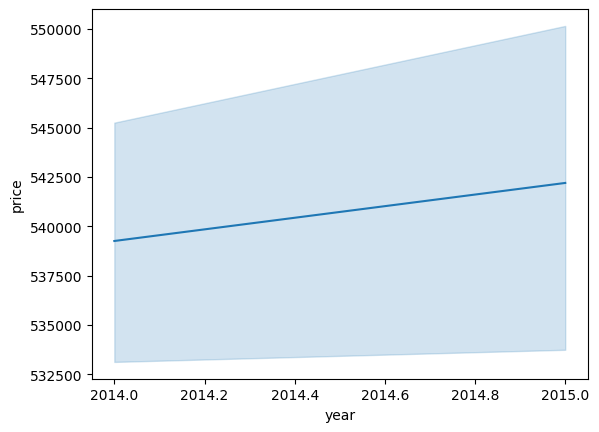

In [32]:
sns.lineplot(x='year',y='price',data=df);

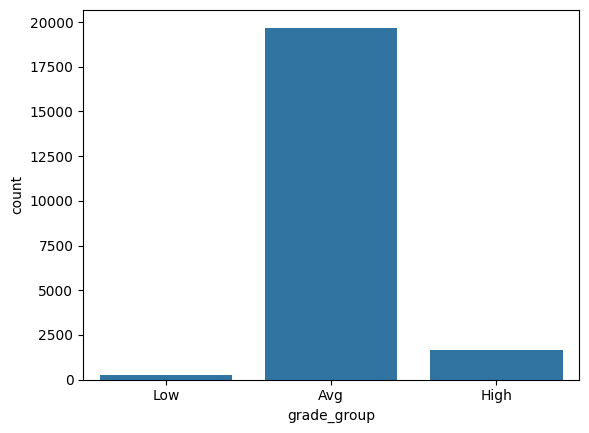

In [33]:
sns.countplot(x='grade_group',data=df);

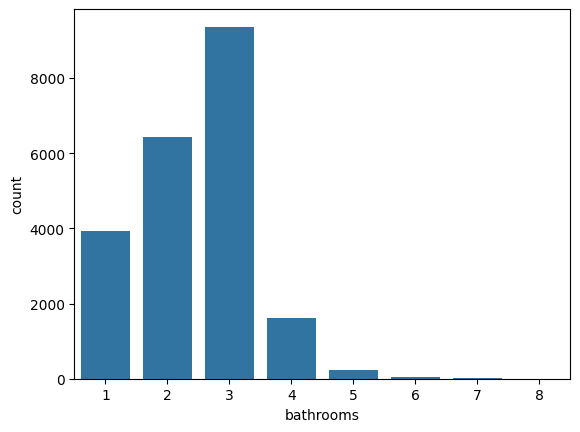

In [34]:
sns.countplot(x='bathrooms',data=df);

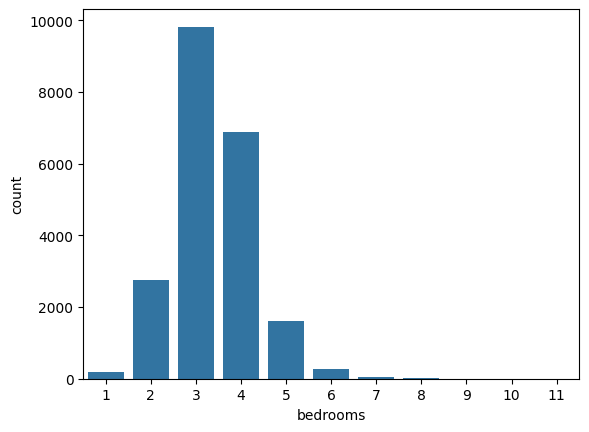

In [35]:
sns.countplot(x='bedrooms',data=df);

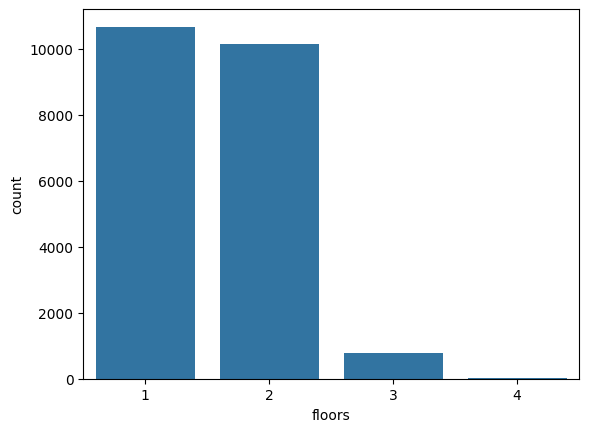

In [36]:
sns.countplot(x='floors',data=df);

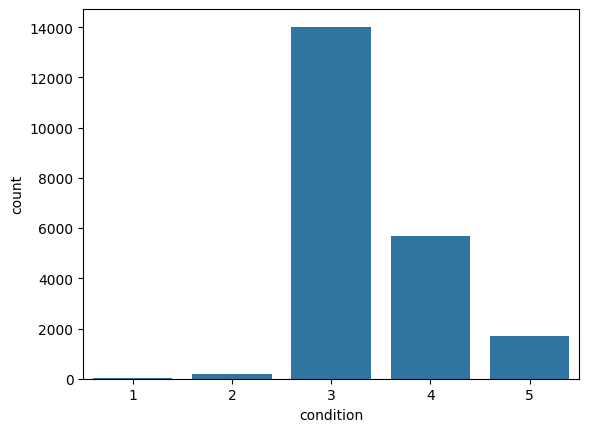

In [37]:
sns.countplot(x='condition',data=df);

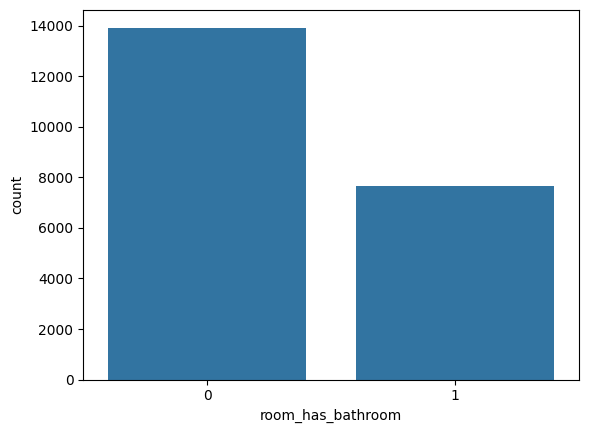

In [38]:
sns.countplot(x='room_has_bathroom',data=df);

# Build The Model

In [39]:
# Encoding the grade_group column
df_encoded = pd.get_dummies(df, columns=['grade_group'])

In [40]:
# Show the Correlations for the price.
corr_matrix = df_encoded.corr()
corr_matrix["price"].sort_values(ascending=False)

price                1.000000
sqft_living          0.701909
sqft_above           0.605371
sqft_living15        0.585247
grade_group_High     0.559527
bathrooms            0.492521
view                 0.397318
sqft_basement        0.323776
bedrooms             0.315960
lat                  0.306777
waterfront           0.266437
floors               0.257960
renov_age            0.117184
sqft_lot             0.089882
sqft_lot15           0.082837
room_has_bathroom    0.071245
condition            0.036025
long                 0.022092
year                 0.003749
month               -0.009956
age                 -0.053931
grade_group_Low     -0.090498
grade_group_Avg     -0.486447
Name: price, dtype: float64

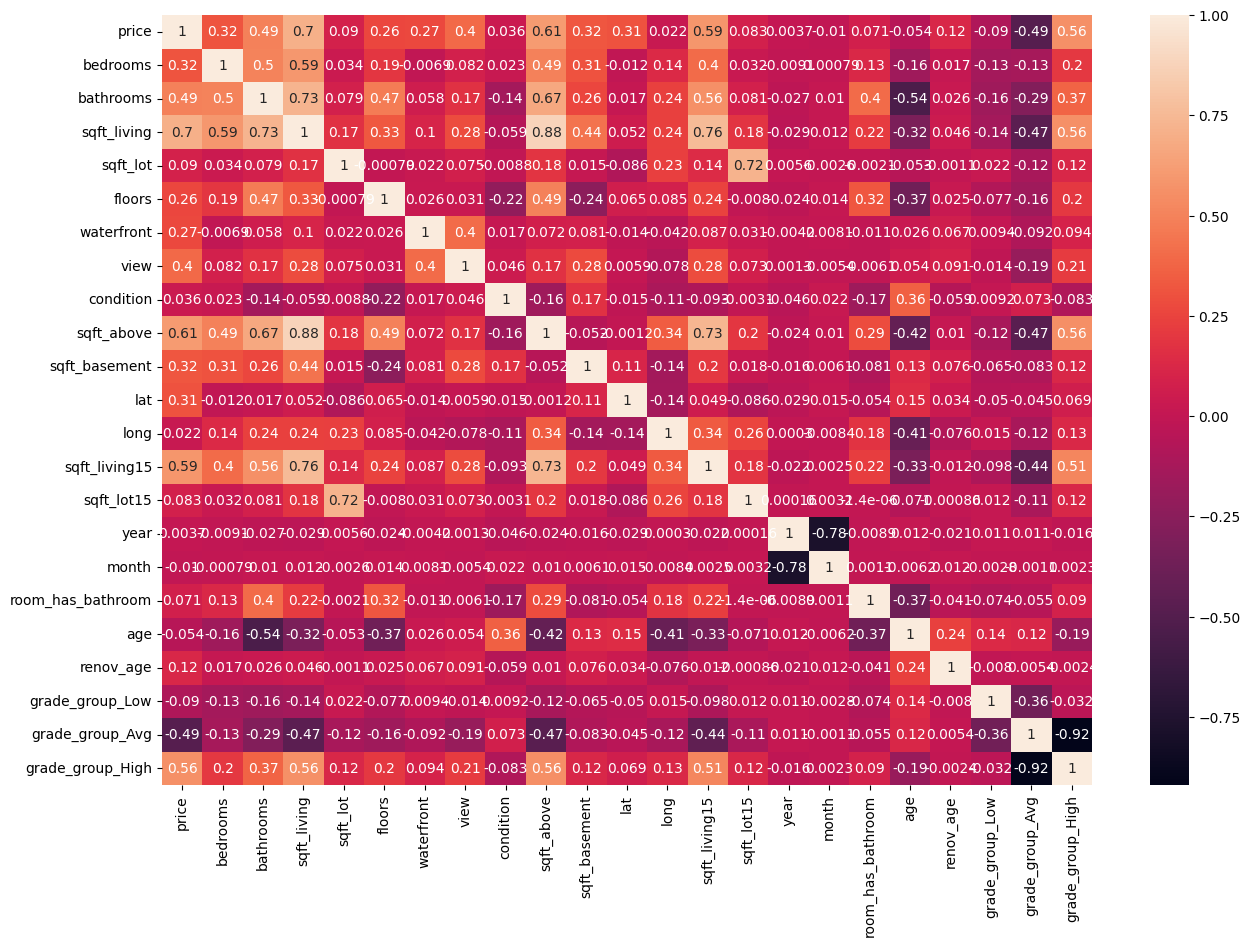

In [41]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True);

In [42]:
# Split the data to our feature matrix & taget vector
X = df_encoded.drop(columns=["price","sqft_living15","sqft_lot15","year","month"])
y = df_encoded["price"]

In [43]:
# Spliting the do to Training and Testing data (80%, 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
print("X_train Shape:",X_train.shape)
print("y_train Shape:",y_train.shape)
print("X_test Shape:",X_test.shape)
print("y_test Shape:",y_test.shape)

X_train Shape: (17277, 18)
y_train Shape: (17277,)
X_test Shape: (4320, 18)
y_test Shape: (4320,)


In [44]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [45]:
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

## Decision Tree Regressor

In [58]:
dt = DecisionTreeRegressor()
dt.fit(X_train_pca, y_train_log)

DecisionTreeRegressor()

In [59]:
pred = dt.predict(X_test_pca)
mean_absolute_error(y_test_log,pred)

0.22892175817393004

In [60]:
pred = np.expm1(dt.predict(X_test_pca))
mean_absolute_error(np.expm1(y_test_log),pred)

130934.55234007187

## XGBoost

In [61]:
xgb = XGBRegressor()
xgb.fit(X_train_pca, y_train_log)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [62]:
pred = xgb.predict(X_test_pca)
mean_absolute_error(y_test_log,pred)

0.16308725432508073

In [63]:
pred = np.expm1(xgb.predict(X_test_pca))
mean_absolute_error(np.expm1(y_test_log),pred)

93731.55729890046

## SVR

In [64]:
svr = SVR(kernel='rbf')
svr.fit(X_train_pca, y_train_log)

SVR()

In [65]:
pred = svr.predict(X_test_pca)
mean_absolute_error(y_test_log,pred)

0.16345705551844802

In [66]:
pred = np.expm1(svr.predict(X_test_pca))
mean_absolute_error(np.expm1(y_test_log),pred)

94060.02611446254

# Fine Tyning

In [68]:
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1], 'kernel': ['rbf']}
svr = SVR()
grid_search = GridSearchCV(svr, param_grid, cv=5)
grid_search.fit(X_train_pca, y_train_log)
best_params = grid_search.best_params_

# 4. Model Training
best_svr = SVR(**best_params)
best_svr.fit(X_train_pca, y_train_log)

# 5. Model Evaluation
pred = best_svr.predict(X_test_pca)
mae = mean_absolute_error(y_test_log, pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.1599241117680502


In [69]:
best_params

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [70]:
grid_search.best_score_

0.8187148003601596

In [71]:
# Trying the best parameters.
svr = SVR(kernel='rbf', C=1,gamma = 0.1)
svr.fit(X_train_pca, y_train_log)
pred = svr.predict(X_test_pca)
mean_absolute_error(y_test_log, pred)

0.1599241117680502

In [72]:
pred = svr.predict(X_train_pca)
mean_absolute_error(y_train_log, pred)

0.14600674175008674

In [73]:
pred = np.expm1(svr.predict(X_test_pca))
mean_absolute_error(np.expm1(y_test_log),pred)

92479.8298297087